<a href="https://colab.research.google.com/github/geneeuchoi/bigdata_assignment2/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B3%BC%EC%A0%9C2_%EC%A7%88%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# 구글 드라이브 mount
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# 파일 읽기
dir_path = "/content/drive/MyDrive/bigdata"
file_name = "서울_월별_PM25_평균.csv"
avg_pm25 = pd.read_csv(f"{dir_path}/{file_name}")
avg_pm25.head()

,지역,1월 평균,2월 평균,3월 평균,4월 평균,5월 평균,6월 평균,7월 평균,8월 평균,9월 평균,10월 평균,11월 평균,12월 평균
0,서울 강남구,23.966262,27.885307,26.548649,18.093706,17.591892,18.026648,18.335142,15.231638,12.552595,15.226721,15.991632,20.512162
1,서울 강동구,27.161028,31.331832,30.435310,18.981716,17.942544,16.218618,15.021398,13.485054,12.108852,18.461028,15.070728,20.113233
2,서울 강북구,24.027778,31.631737,29.208672,19.367133,17.163735,16.402797,17.657218,13.922659,10.598326,13.505391,15.257703,19.919595
3,서울 강서구,23.991859,30.596702,31.548714,19.026723,18.122795,16.810924,16.393099,13.896599,11.233672,12.982409,13.783916,18.521680
4,서울 관악구,22.898212,28.435241,32.761644,21.415266,19.465847,17.970423,16.867847,14.522792,12.422805,15.919267,15.618881,21.888889


## 질문1: 어느 달이 미세먼지가 제일 낮을까? / 높을까?

In [103]:
# 각 지역별로 평균이 가장 높은 달과 값, 가장 낮은 달과 값 구하기
highest_pm25 = avg_pm25.set_index('지역').idxmax(axis=1)  # 지역별 가장 높은 값의 월
lowest_pm25 = avg_pm25.set_index('지역').idxmin(axis=1)   # 지역별 가장 낮은 값의 월

highest_values = avg_pm25.set_index('지역').max(axis=1)  # 지역별 가장 높은 값
lowest_values = avg_pm25.set_index('지역').min(axis=1)   # 지역별 가장 낮은 값

# 결과를 데이터프레임으로 정리
result = pd.DataFrame({
    '가장 높은 월': highest_pm25,
    '최고 PM2.5': highest_values,
    '가장 낮은 월': lowest_pm25,
    '최저 PM2.5': lowest_values
}).reset_index()

# 결과 출력
print(result)


         지역 가장 높은 월   최고 PM2.5 가장 낮은 월   최저 PM2.5
0    서울 강남구   2월 평균  27.885307   9월 평균  12.552595
1    서울 강동구   2월 평균  31.331832   9월 평균  12.108852
2    서울 강북구   2월 평균  31.631737   9월 평균  10.598326
3    서울 강서구   3월 평균  31.548714   9월 평균  11.233672
4    서울 관악구   3월 평균  32.761644   9월 평균  12.422805
5    서울 광진구   2월 평균  29.624812   9월 평균  11.057343
6    서울 구로구   3월 평균  32.860354   9월 평균   8.057103
7    서울 금천구   2월 평균  32.664027   9월 평균  10.335894
8    서울 노원구   2월 평균  35.221053   9월 평균  11.516266
9    서울 도봉구   3월 평균  29.136486   9월 평균   9.497101
10  서울 동대문구   2월 평균  30.367910   9월 평균  11.713139
11   서울 동작구   2월 평균  33.615616   9월 평균  12.383916
12   서울 마포구   3월 평균  31.154263   9월 평균  12.312046
13  서울 서대문구   2월 평균  28.010093   9월 평균   9.423347
14   서울 서초구   3월 평균  33.270270   9월 평균   8.324022
15   서울 성동구   2월 평균  27.151869   9월 평균  11.946629
16   서울 성북구   3월 평균  30.530529   9월 평균   9.239163
17   서울 송파구   2월 평균  28.890112   9월 평균  12.090239
18   서울 양천구   2월 평균  34.626133   9월 평균  10.741597


모든 지역이 9월에 가장 낮은 미세먼지 농도를 기록했다.  
거의 모든 지역이 2, 3월에 가장 높은 미세먼지 농도를 기록했다.

## 질문2: 계절과 미세먼지 농도가 관련이 있을까?

In [104]:
import pandas as pd

# 계절별 그룹화 정의
season_map = {
    '1월 평균': '겨울', '2월 평균': '겨울', '3월 평균': '봄',
    '4월 평균': '봄', '5월 평균': '봄', '6월 평균': '여름',
    '7월 평균': '여름', '8월 평균': '여름', '9월 평균': '가을',
    '10월 평균': '가을', '11월 평균': '가을', '12월 평균': '겨울'
}

# 열 이름을 계절로 매핑
avg_pm25_season = avg_pm25.set_index('지역').rename(columns=season_map)

# 계절별 PM2.5 평균 계산
seasonal_avg = avg_pm25_season.groupby(axis=1, level=0).mean()

# 지역별 계절 평균 정리
seasonal_avg_reset = seasonal_avg.reset_index()
seasonal_avg_reset.columns = ['지역', '겨울', '봄', '여름', '가을']
print(seasonal_avg_reset)


         지역         겨울          봄         여름         가을
0    서울 강남구  14.590316  24.121244  20.744749  17.197810
1    서울 강동구  15.213536  26.202031  22.453190  14.908357
2    서울 강북구  13.120473  25.193036  21.913180  15.994225
3    서울 강서구  12.666666  24.370080  22.899411  15.700207
4    서울 관악구  14.653651  24.407447  24.547586  16.453687
5    서울 광진구  12.958115  24.103563  21.216627  15.225838
6    서울 구로구  12.415465  25.045546  23.606398  11.900647
7    서울 금천구  13.417412  26.656904  22.616726  17.392123
8    서울 노원구  14.880005  29.085108  24.222775  15.563730
9    서울 도봉구  13.307677  24.297853  22.001153  13.702071
10  서울 동대문구  14.656563  24.827408  21.926599  15.992160
11   서울 동작구  14.459557  27.861695  23.046284  15.989130
12   서울 마포구  14.766651  25.858657  23.851309  15.805048
13  서울 서대문구  13.849121  23.960113  20.426699  12.762330
14   서울 서초구  14.864788  24.974844  24.373862  12.486717
15   서울 성동구  14.023615  22.772002  21.292674  16.311034
16   서울 성북구  13.377245  25.690812  23.168128  14

<ipython-input-104-d2955422f2a5>:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  seasonal_avg = avg_pm25_season.groupby(axis=1, level=0).mean()


In [105]:
# matplotlib 한글 인코딩
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

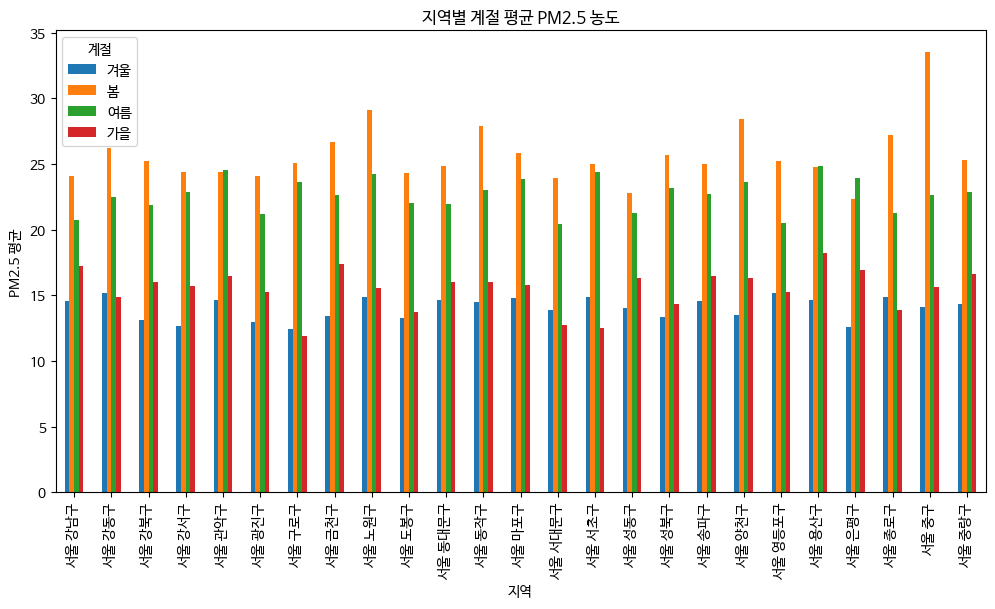

In [106]:
# 계절별 평균 농도 시각화
seasonal_avg_reset.set_index('지역').plot(kind='bar', figsize=(12, 6))
plt.title('지역별 계절 평균 PM2.5 농도')
plt.ylabel('PM2.5 평균')
plt.xlabel('지역')
plt.legend(title='계절')
plt.show()


거의 모든 지역이 봄 > 여름 > 가을, 겨울 순으로 초미세먼지 농도가 높다.


## 질문3: 중국의 미세먼지 농도와 관련이 있을까?

In [107]:
# 파일 읽기
# 우리나라와 제일 가까운 산둥성의 대기질 데이터를 가져왔다.
dir_path = "/content/drive/MyDrive/bigdata"
file_name = "shandong-institute of economics, jinan-air-quality.csv"
china_data = pd.read_csv(f"{dir_path}/{file_name}")

# 데이터셋 확인
china_data.head()

,date,pm25,pm10,o3,no2,so2,co
0,2024/12/1,138,56,15,15,3,
1,2024/12/2,79,39,21,12,2,
2,2024/12/3,63,57,13,17,4,
3,2024/12/4,101,71,21,14,3,
4,2024/12/5,132,68,26,17,4,


In [108]:
# 데이터셋 상세정보 확인
china_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3895 non-null   object
 1    pm25   3895 non-null   object
 2    pm10   3895 non-null   object
 3    o3     3895 non-null   object
 4    no2    3895 non-null   object
 5    so2    3895 non-null   object
 6    co     3895 non-null   object
dtypes: object(7)
memory usage: 213.1+ KB


In [109]:
# 2023년 데이터만 필터링
china_data['date'] = pd.to_datetime(china_data['date'], format='%Y/%m/%d')  # 날짜를 datetime 형식으로 변환
china_data_2023 = china_data[china_data['date'].dt.year == 2023]  # 2023년 데이터 필터링

# 월 정보 추출 및 'month' 칼럼 추가
china_data_2023['month'] = china_data_2023['date'].dt.month

# 월, 초미세먼지 수치만 선택
china_data_2023 = china_data_2023[['month', ' pm25']]

china_data_2023

<ipython-input-109-99dc398727dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_data_2023['month'] = china_data_2023['date'].dt.month


,month,pm25
347,10,25
348,10,46
349,10,59
350,10,86
351,10,69
...,...,...
707,3,138
708,3,79
709,3,102
802,1,144


In [110]:
# pm25 값을 숫자로 변환
china_data_2023['중국 pm25'] = pd.to_numeric(china_data[' pm25'], errors='coerce')  # 숫자로 변환, 변환 불가능한 값은 NaN 처리

# 결측치 제거
china_data_2023 = china_data_2023.dropna(subset=['중국 pm25'])

# 이상치 처리
Q1 = china_data_2023['중국 pm25'].quantile(0.25)
Q3 = china_data_2023['중국 pm25'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 대체
china_data_2023['중국 pm25'] = china_data_2023['중국 pm25'].apply(
    lambda x: min(max(x, lower_bound), upper_bound) if x < lower_bound or x > upper_bound else x
)

# 월별 평균 PM2.5 계산
monthly_avg_pm25 = china_data_2023.groupby('month')['중국 pm25'].mean().reset_index()

# 결과 확인
print(monthly_avg_pm25)


    month     중국 pm25
0       1  121.225806
1       2  116.428571
2       3  112.387097
3       4   91.482759
4       5   84.451613
5       6   64.066667
6       7   63.870968
7       8   68.032258
8       9   87.466667
9      10   91.387097
10     11   93.466667
11     12  117.903226


<ipython-input-110-c162d1a825d5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_data_2023['중국 pm25'] = china_data_2023['중국 pm25'].apply(


In [111]:
# avg_pm25 데이터를 long format으로 변환
avg_pm25_long = avg_pm25.melt(id_vars=['지역'], var_name='month', value_name='pm25')

# "월 평균" 제거 후 month를 숫자형으로 변환
avg_pm25_long['month'] = avg_pm25_long['month'].str.replace('월 평균', '').astype(int)

# avg_pm25_long 데이터를 pivot 형태로 변환
avg_pm25_pivot = avg_pm25_long.pivot(index='month', columns='지역', values='pm25').reset_index()

# monthly_avg_pm25와 병합
merged_data = pd.merge(monthly_avg_pm25, avg_pm25_pivot, on='month')

# 결과 확인
print(merged_data)


    month     중국 pm25     서울 강남구     서울 강동구     서울 강북구     서울 강서구     서울 관악구  \
0       1  121.225806  23.966262  27.161028  24.027778  23.991859  22.898212   
1       2  116.428571  27.885307  31.331832  31.631737  30.596702  28.435241   
2       3  112.387097  26.548649  30.435310  29.208672  31.548714  32.761644   
3       4   91.482759  18.093706  18.981716  19.367133  19.026723  21.415266   
4       5   84.451613  17.591892  17.942544  17.163735  18.122795  19.465847   
5       6   64.066667  18.026648  16.218618  16.402797  16.810924  17.970423   
6       7   63.870968  18.335142  15.021398  17.657218  16.393099  16.867847   
7       8   68.032258  15.231638  13.485054  13.922659  13.896599  14.522792   
8       9   87.466667  12.552595  12.108852  10.598326  11.233672  12.422805   
9      10   91.387097  15.226721  18.461028  13.505391  12.982409  15.919267   
10     11   93.466667  15.991632  15.070728  15.257703  13.783916  15.618881   
11     12  117.903226  20.512162  20.113

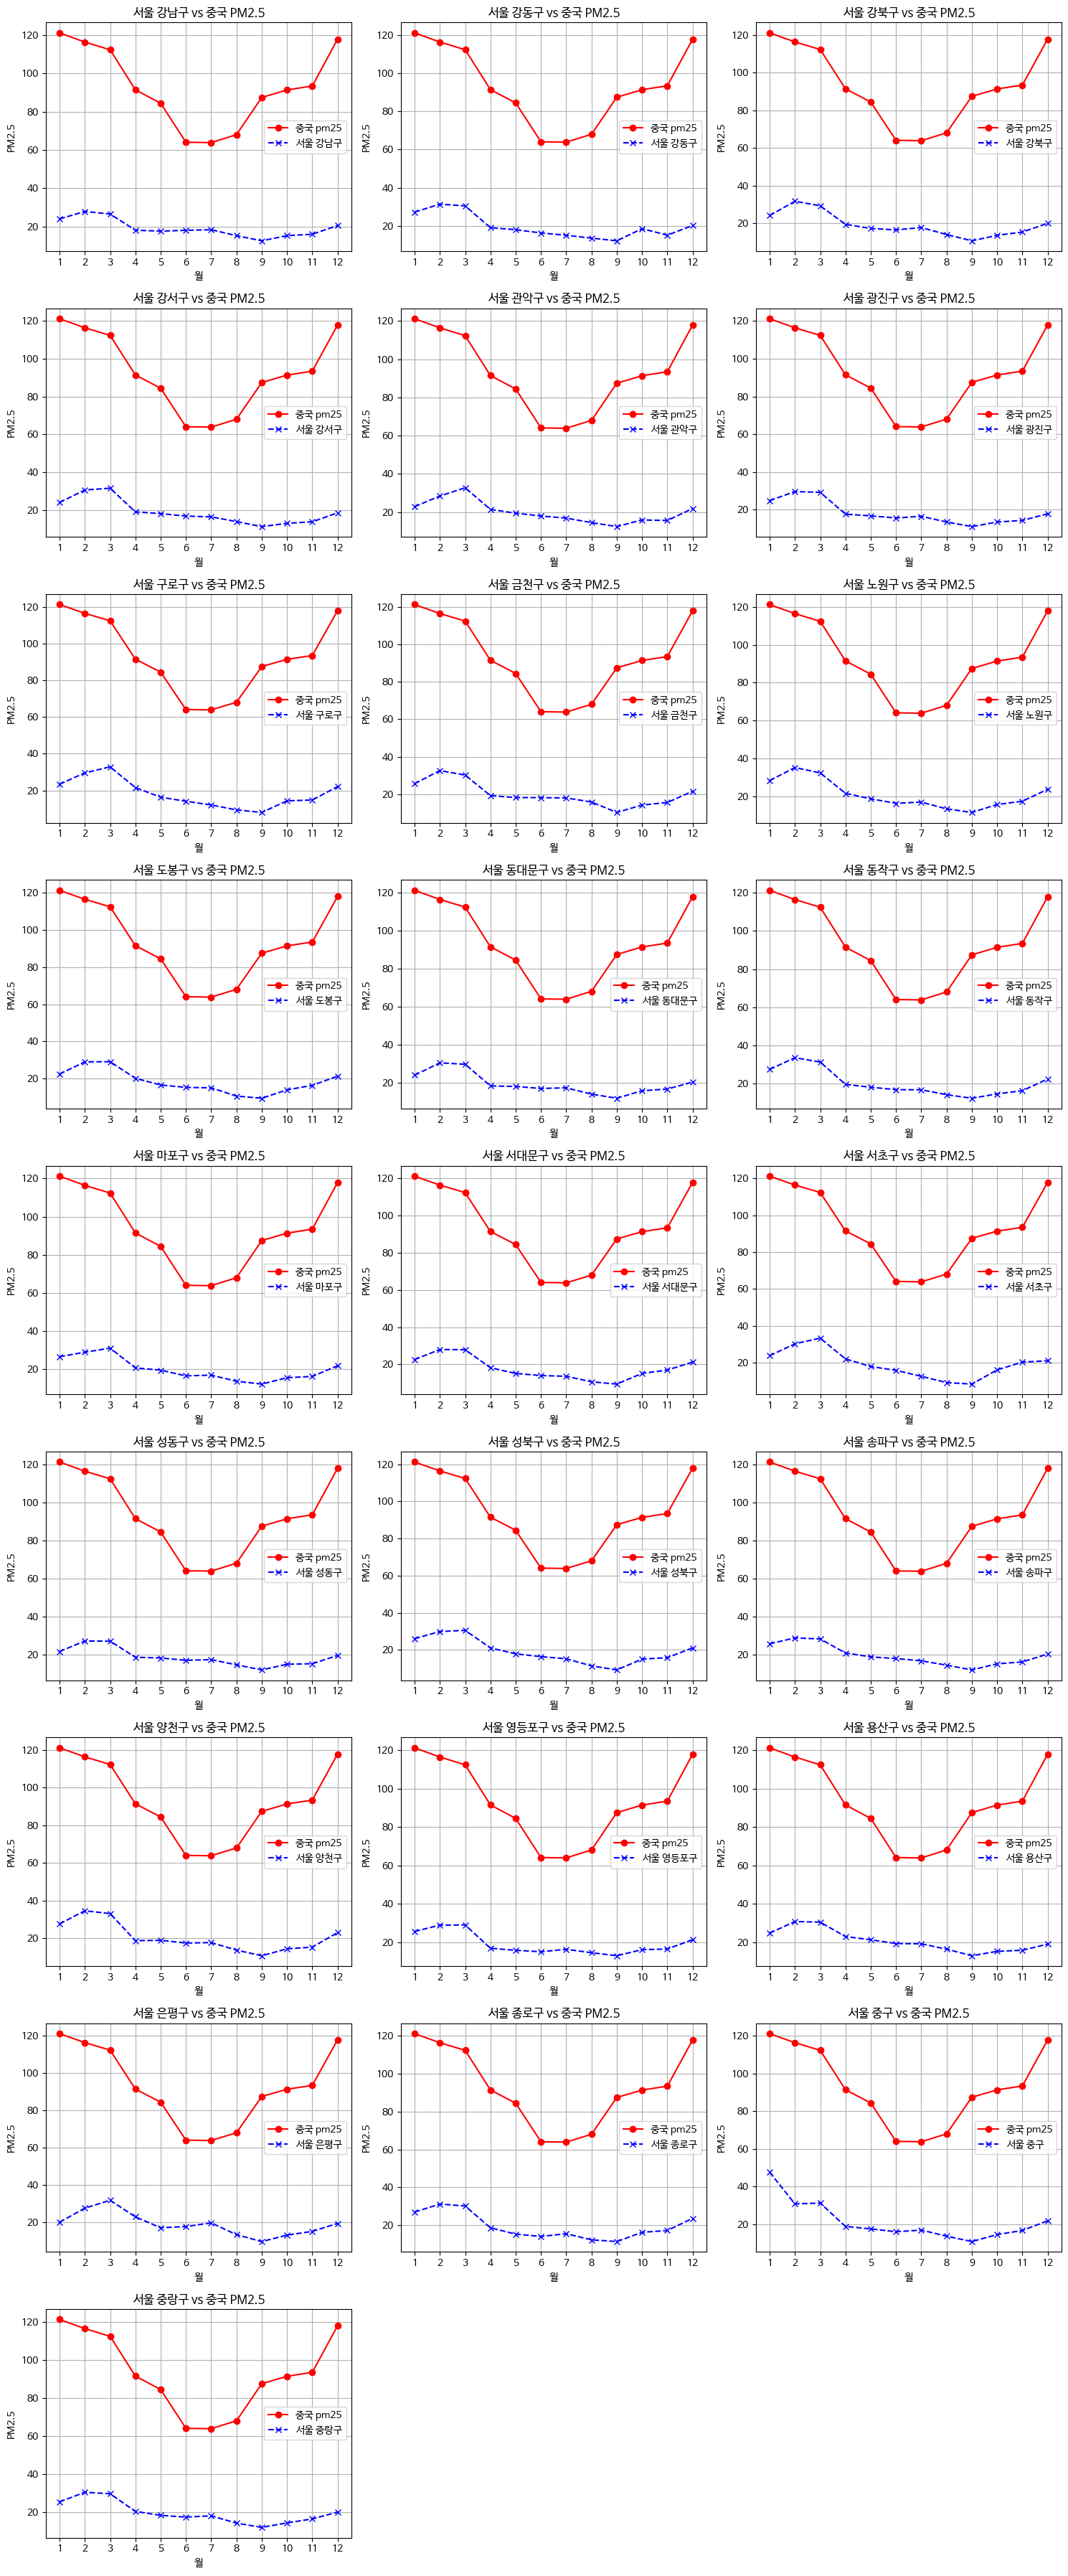

In [112]:
import matplotlib.pyplot as plt

# 지역 이름 리스트 추출
regions = merged_data.columns[2:]  # '중국 pm25'와 'month' 제외

# 각 지역별로 그래프 생성
num_regions = len(regions)
rows = (num_regions + 2) // 3  # 3개의 열 기준으로 행 계산
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))

# 플롯을 2D 배열로 전환
axes = axes.flatten()

for idx, region in enumerate(regions):
    ax = axes[idx]

    # 해당 지역 데이터 추출
    ax.plot(merged_data['month'], merged_data['중국 pm25'], label='중국 pm25', color='red', linestyle='-', marker='o')
    ax.plot(merged_data['month'], merged_data[region], label=region, color='blue', linestyle='--', marker='x')

    # 그래프 설정
    ax.set_title(f'{region} vs 중국 PM2.5')
    ax.set_xlabel('월')
    ax.set_ylabel('PM2.5')
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    ax.legend()

# 남은 서브플롯 비우기
for idx in range(num_regions, len(axes)):
    fig.delaxes(axes[idx])

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()



[서울 강남구]
회귀 계수 (중국 PM2.5가 서울 강남구에 미치는 영향): 0.15
절편: 4.98
결정계수 (R^2): 0.45


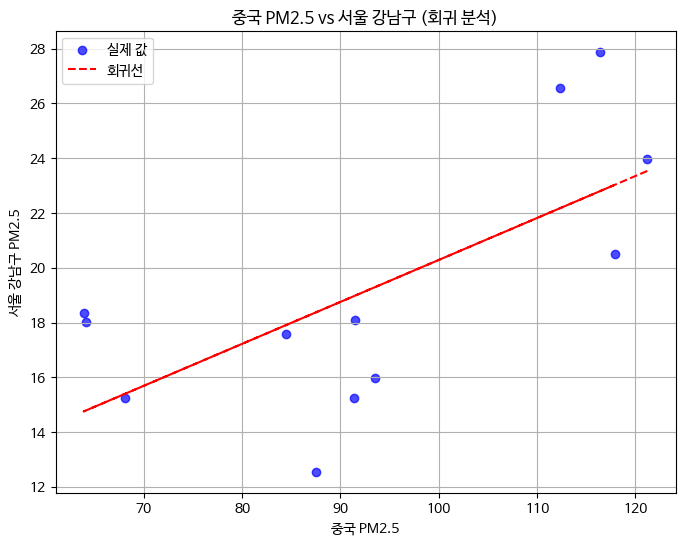


[서울 강동구]
회귀 계수 (중국 PM2.5가 서울 강동구에 미치는 영향): 0.24
절편: -2.74
결정계수 (R^2): 0.60


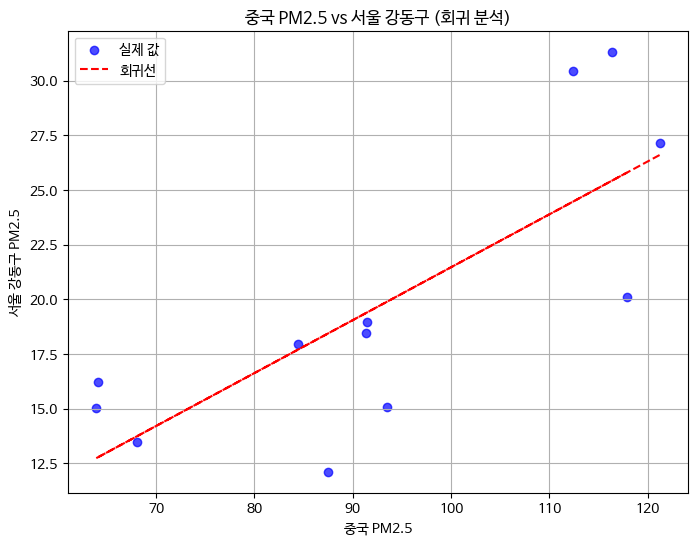


[서울 강북구]
회귀 계수 (중국 PM2.5가 서울 강북구에 미치는 영향): 0.20
절편: 0.19
결정계수 (R^2): 0.45


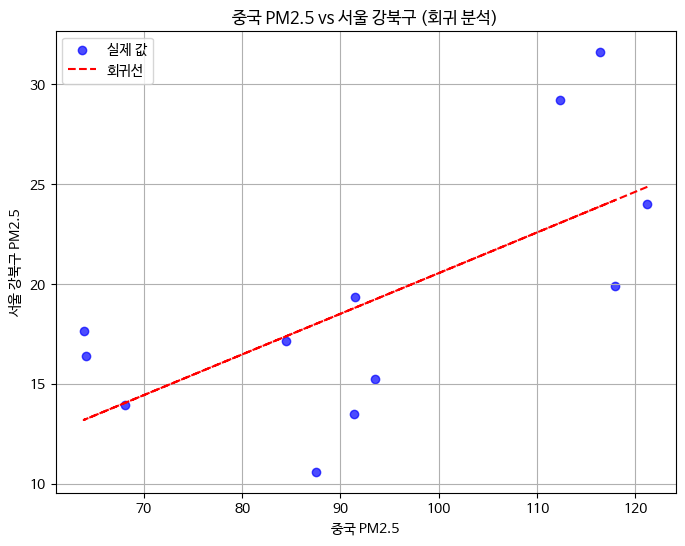


[서울 강서구]
회귀 계수 (중국 PM2.5가 서울 강서구에 미치는 영향): 0.20
절편: 0.05
결정계수 (R^2): 0.41


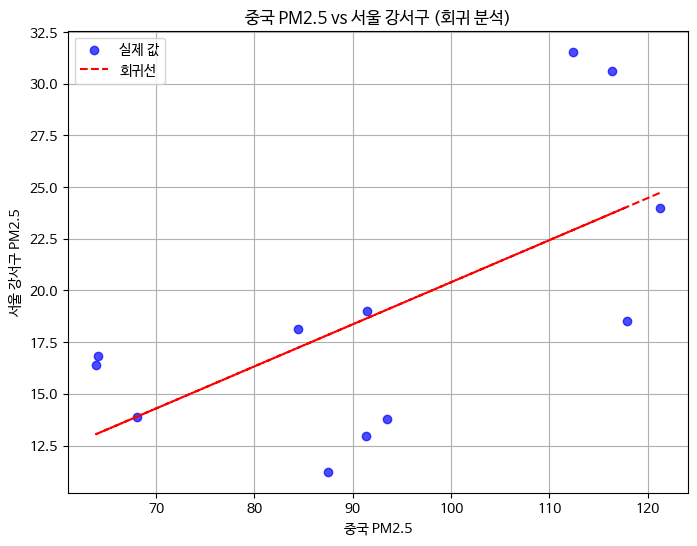


[서울 관악구]
회귀 계수 (중국 PM2.5가 서울 관악구에 미치는 영향): 0.19
절편: 2.30
결정계수 (R^2): 0.45


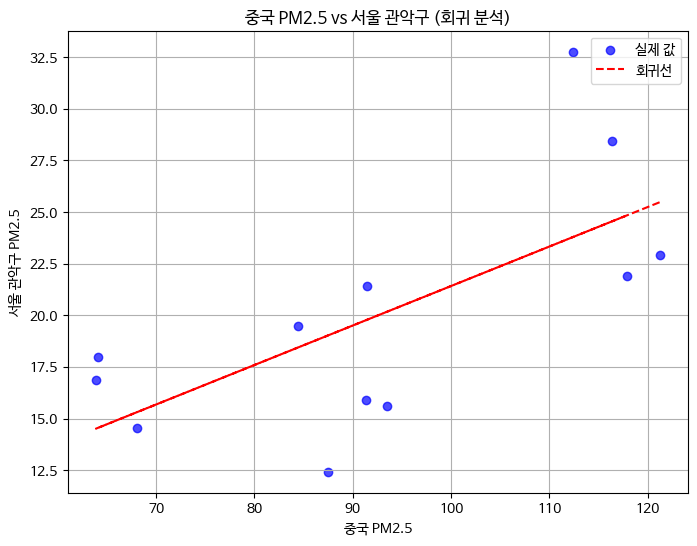


[서울 광진구]
회귀 계수 (중국 PM2.5가 서울 광진구에 미치는 영향): 0.20
절편: -0.31
결정계수 (R^2): 0.46


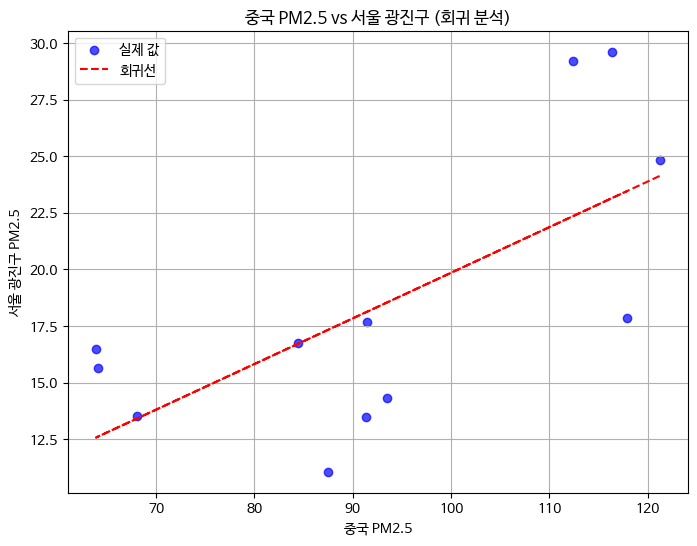


[서울 구로구]
회귀 계수 (중국 PM2.5가 서울 구로구에 미치는 영향): 0.29
절편: -8.66
결정계수 (R^2): 0.61


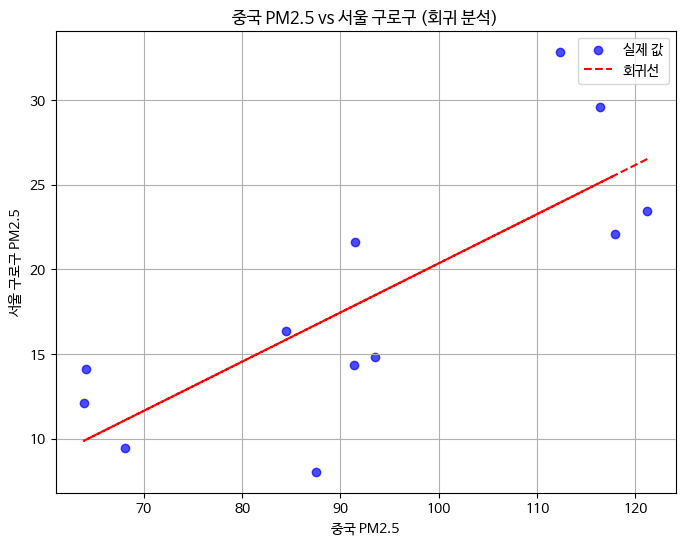


[서울 금천구]
회귀 계수 (중국 PM2.5가 서울 금천구에 미치는 영향): 0.21
절편: 0.87
결정계수 (R^2): 0.43


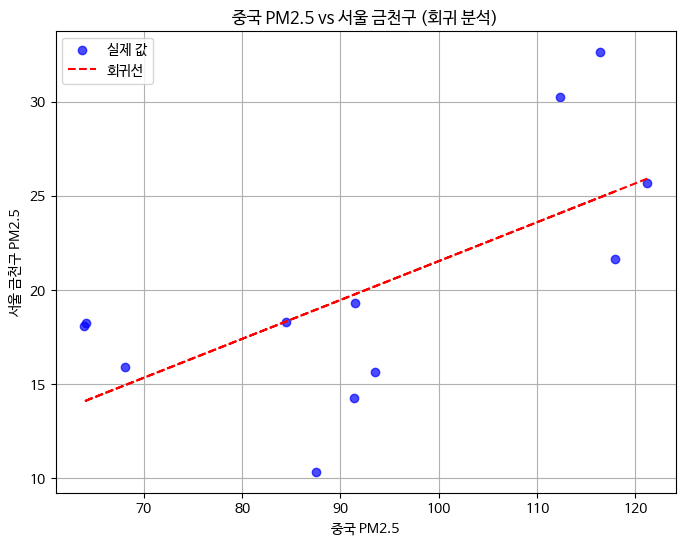


[서울 노원구]
회귀 계수 (중국 PM2.5가 서울 노원구에 미치는 영향): 0.28
절편: -5.32
결정계수 (R^2): 0.61


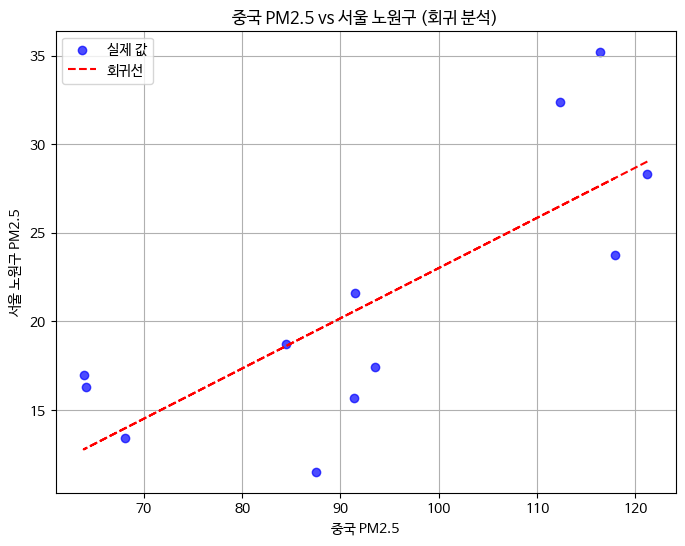


[서울 도봉구]
회귀 계수 (중국 PM2.5가 서울 도봉구에 미치는 영향): 0.23
절편: -2.94
결정계수 (R^2): 0.57


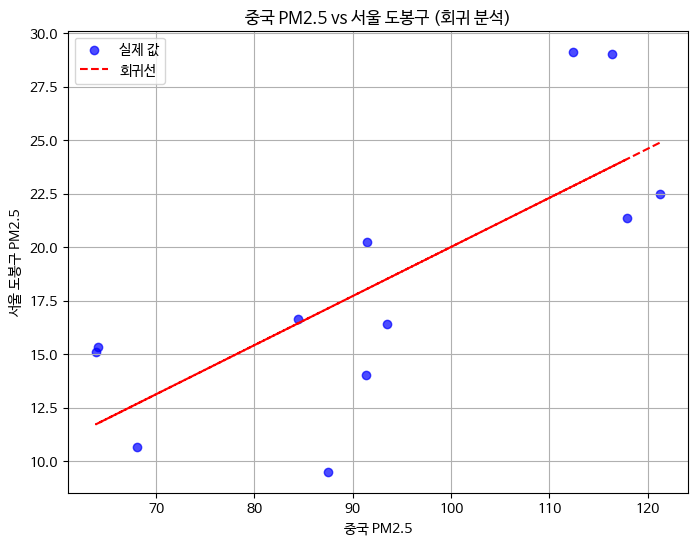


[서울 동대문구]
회귀 계수 (중국 PM2.5가 서울 동대문구에 미치는 영향): 0.20
절편: 1.08
결정계수 (R^2): 0.50


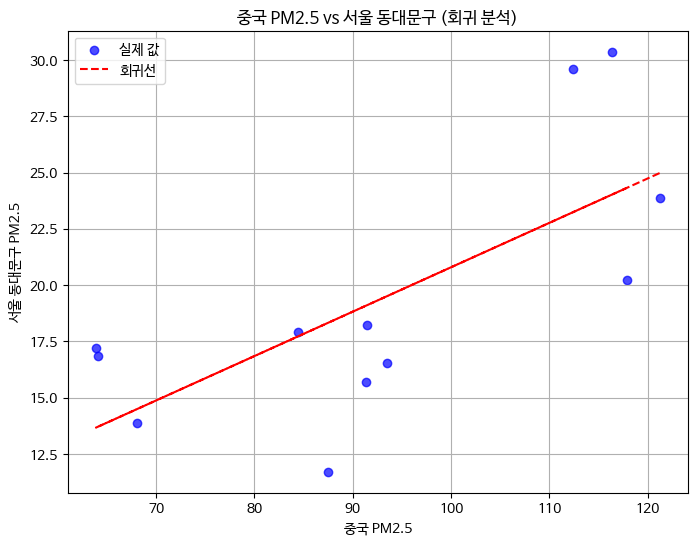


[서울 동작구]
회귀 계수 (중국 PM2.5가 서울 동작구에 미치는 영향): 0.25
절편: -3.13
결정계수 (R^2): 0.57


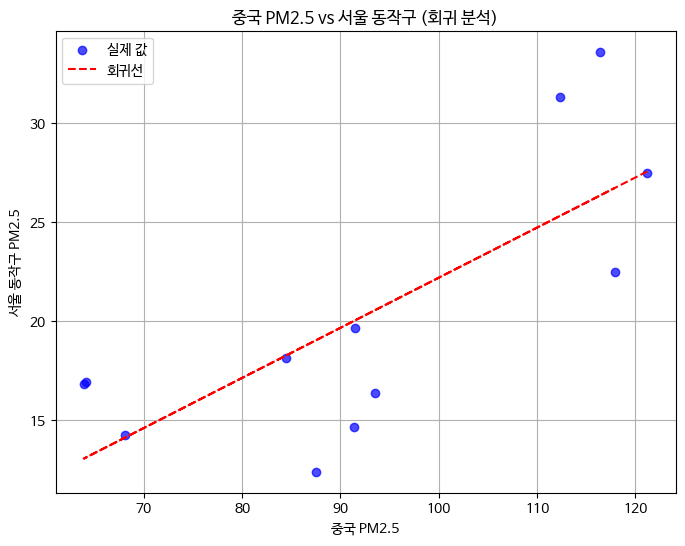


[서울 마포구]
회귀 계수 (중국 PM2.5가 서울 마포구에 미치는 영향): 0.22
절편: -0.44
결정계수 (R^2): 0.58


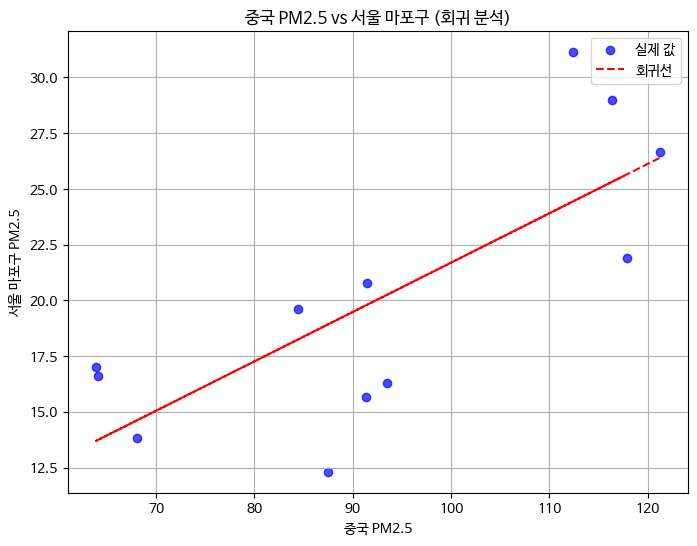


[서울 서대문구]
회귀 계수 (중국 PM2.5가 서울 서대문구에 미치는 영향): 0.24
절편: -4.44
결정계수 (R^2): 0.67


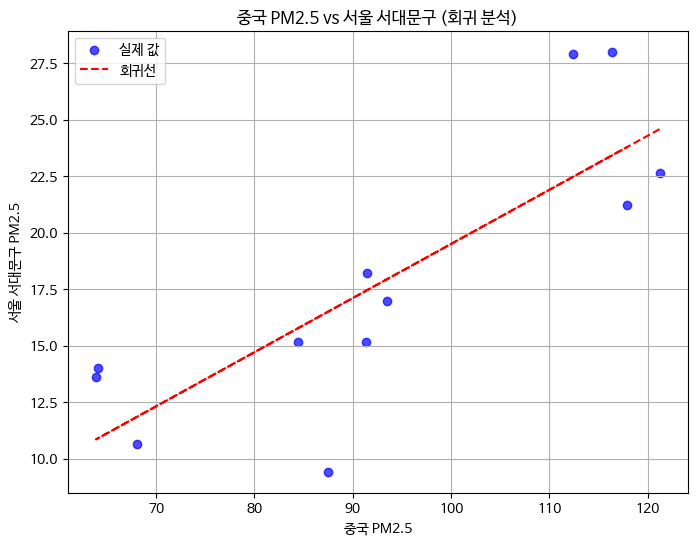


[서울 서초구]
회귀 계수 (중국 PM2.5가 서울 서초구에 미치는 영향): 0.28
절편: -6.54
결정계수 (R^2): 0.57


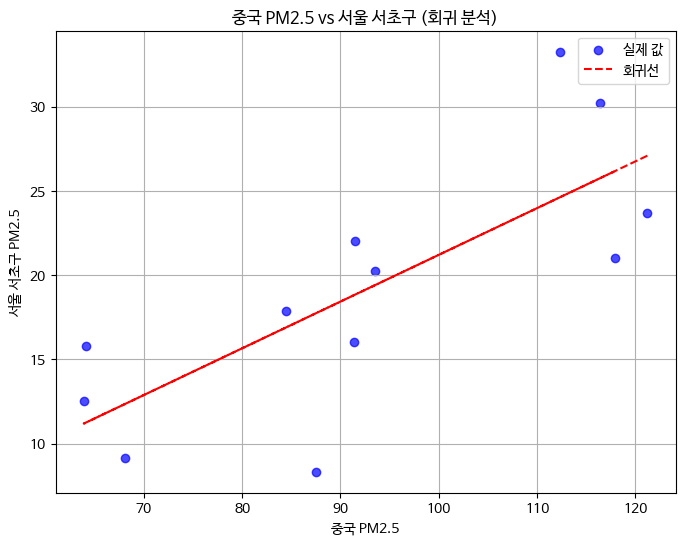


[서울 성동구]
회귀 계수 (중국 PM2.5가 서울 성동구에 미치는 영향): 0.15
절편: 4.96
결정계수 (R^2): 0.42


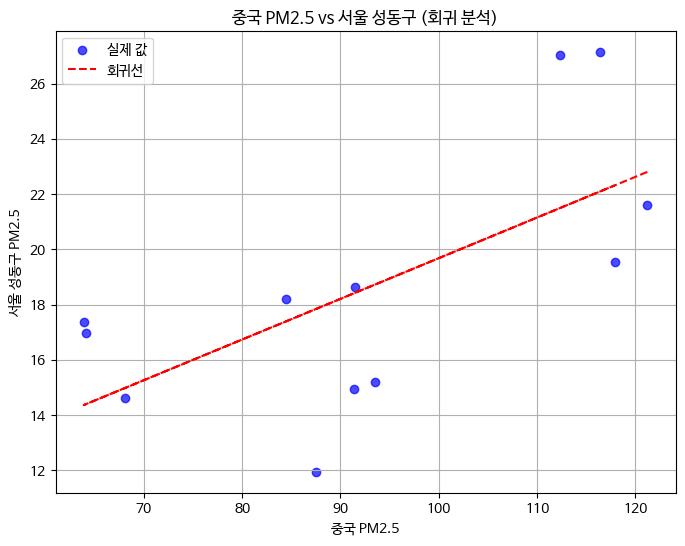


[서울 성북구]
회귀 계수 (중국 PM2.5가 서울 성북구에 미치는 영향): 0.25
절편: -3.67
결정계수 (R^2): 0.56


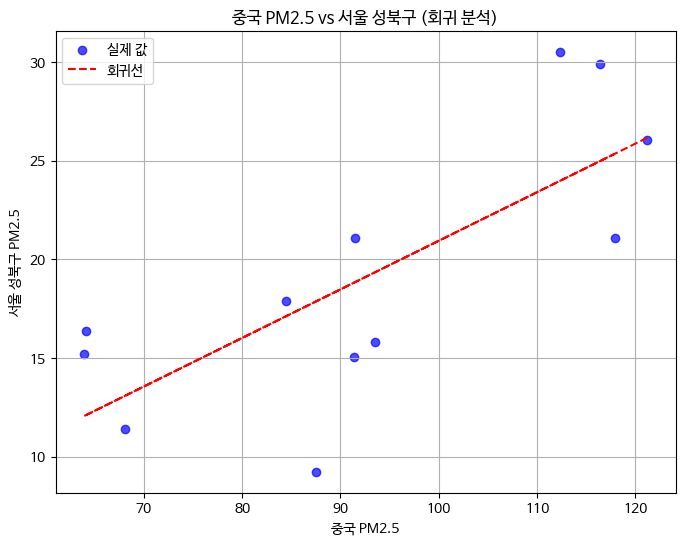


[서울 송파구]
회귀 계수 (중국 PM2.5가 서울 송파구에 미치는 영향): 0.19
절편: 2.50
결정계수 (R^2): 0.50


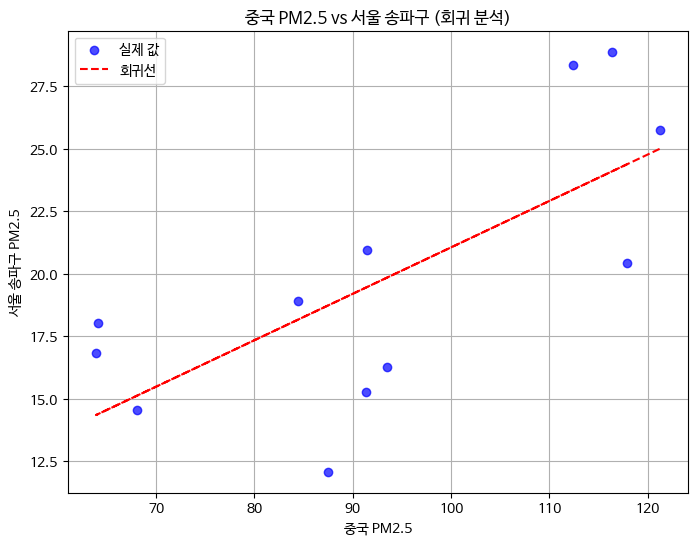


[서울 양천구]
회귀 계수 (중국 PM2.5가 서울 양천구에 미치는 영향): 0.26
절편: -3.98
결정계수 (R^2): 0.51


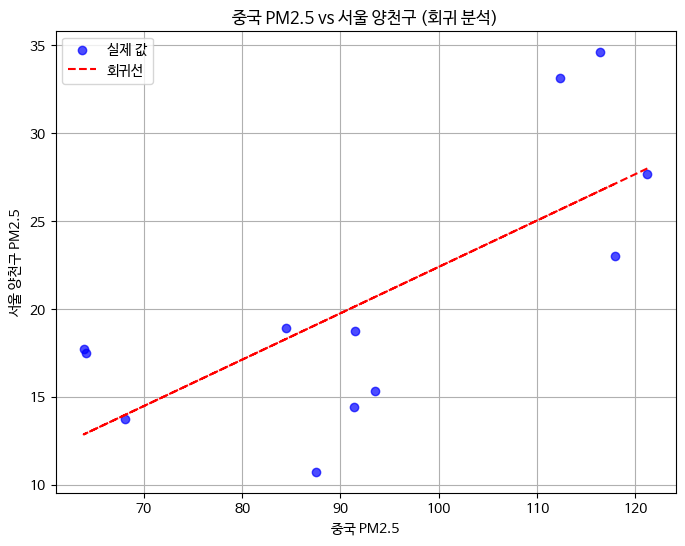


[서울 영등포구]
회귀 계수 (중국 PM2.5가 서울 영등포구에 미치는 영향): 0.22
절편: -1.27
결정계수 (R^2): 0.64


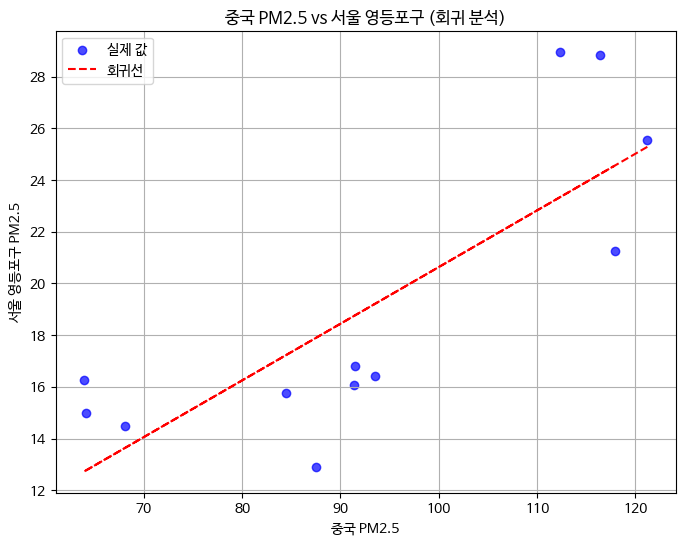


[서울 용산구]
회귀 계수 (중국 PM2.5가 서울 용산구에 미치는 영향): 0.15
절편: 6.42
결정계수 (R^2): 0.31


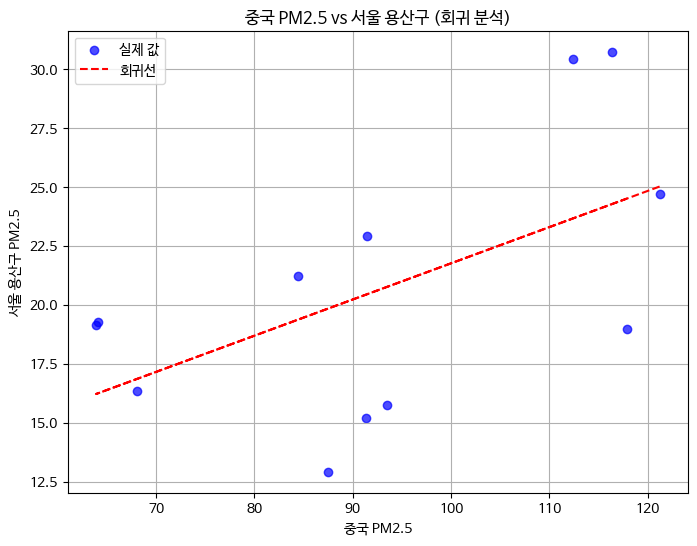


[서울 은평구]
회귀 계수 (중국 PM2.5가 서울 은평구에 미치는 영향): 0.15
절편: 4.97
결정계수 (R^2): 0.25


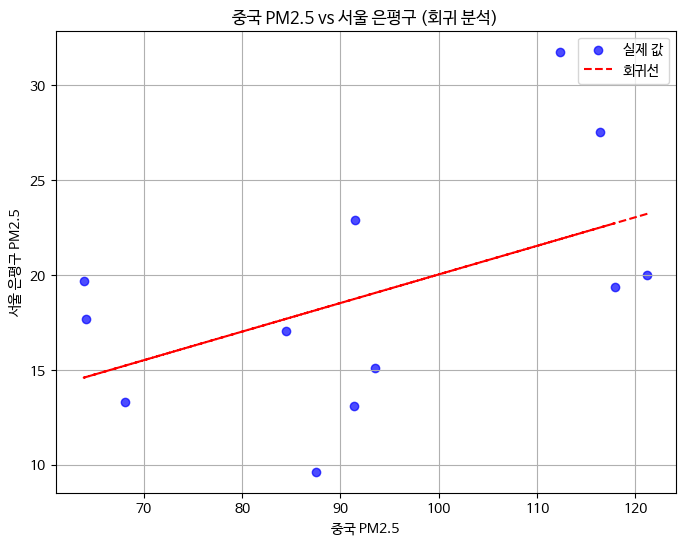


[서울 종로구]
회귀 계수 (중국 PM2.5가 서울 종로구에 미치는 영향): 0.28
절편: -6.71
결정계수 (R^2): 0.72


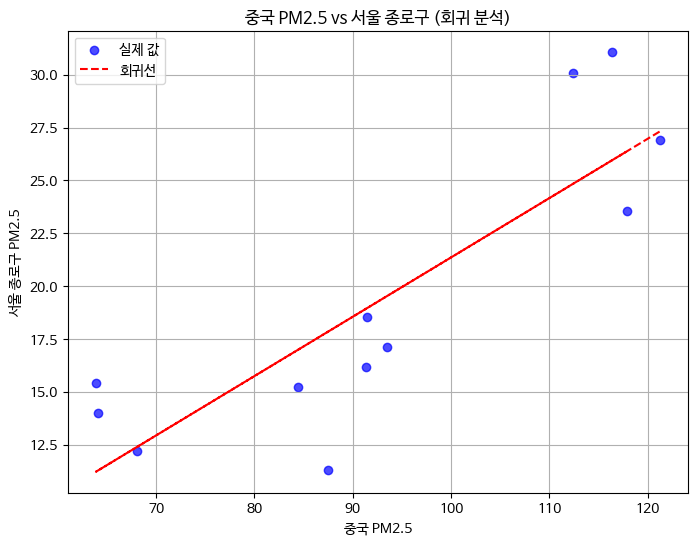


[서울 중구]
회귀 계수 (중국 PM2.5가 서울 중구에 미치는 영향): 0.37
절편: -12.50
결정계수 (R^2): 0.54


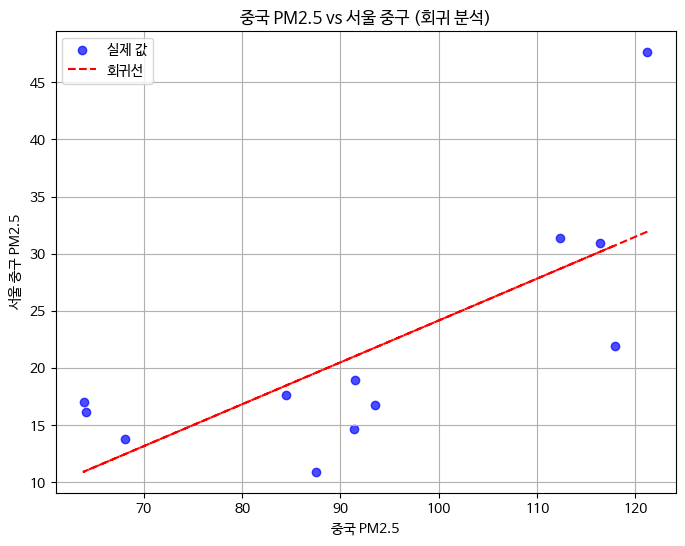


[서울 중랑구]
회귀 계수 (중국 PM2.5가 서울 중랑구에 미치는 영향): 0.19
절편: 1.78
결정계수 (R^2): 0.46


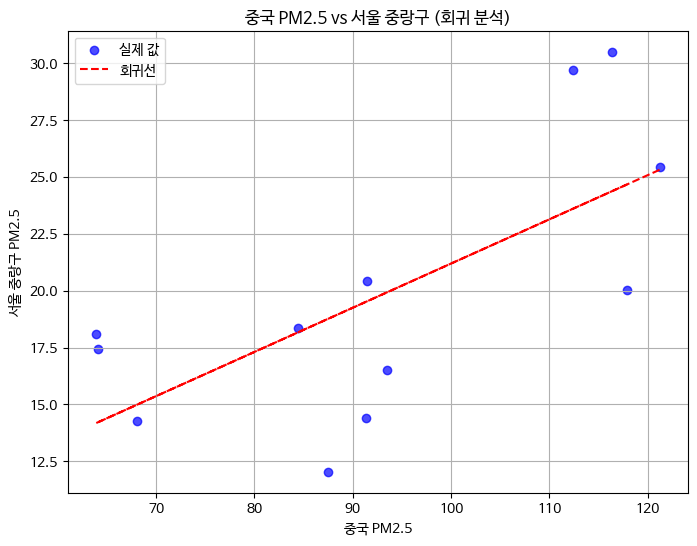

In [113]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# 1. 지역 이름 리스트
regions = merged_data.columns[2:]  # 'month'와 '중국 pm25' 제외

results = []

# 2. 각 지역별 회귀분석
for region in regions:
    X = merged_data['중국 pm25'].values.reshape(-1, 1)  # 중국 PM2.5 (독립변수)
    y = merged_data[region].values  # 해당 지역의 PM2.5 (종속변수)

    # 회귀 모델 생성 및 학습
    model = LinearRegression()
    model.fit(X, y)

    # 회귀계수와 결정계수 출력
    print(f"\n[{region}]")
    print(f"회귀 계수 (중국 PM2.5가 {region}에 미치는 영향): {model.coef_[0]:.2f}")
    print(f"절편: {model.intercept_:.2f}")
    print(f"결정계수 (R^2): {model.score(X, y):.2f}")

    results.append({'지역': region, '결정계수 (R²)': model.score(X, y)})

    # 시각화
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.7, label='실제 값')
    plt.plot(X, model.predict(X), color='red', linestyle='--', label='회귀선')
    plt.title(f'중국 PM2.5 vs {region} (회귀 분석)')
    plt.xlabel('중국 PM2.5')
    plt.ylabel(f'{region} PM2.5')
    plt.legend()
    plt.grid()
    plt.show()


In [114]:
# 4. 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

print(results_df)

         지역  결정계수 (R²)
0    서울 강남구   0.453574
1    서울 강동구   0.601741
2    서울 강북구   0.445655
3    서울 강서구   0.411012
4    서울 관악구   0.451044
5    서울 광진구   0.462895
6    서울 구로구   0.605998
7    서울 금천구   0.429678
8    서울 노원구   0.611476
9    서울 도봉구   0.565566
10  서울 동대문구   0.498065
11   서울 동작구   0.574288
12   서울 마포구   0.576395
13  서울 서대문구   0.665686
14   서울 서초구   0.572794
15   서울 성동구   0.422291
16   서울 성북구   0.564147
17   서울 송파구   0.504217
18   서울 양천구   0.513809
19  서울 영등포구   0.641458
20   서울 용산구   0.313154
21   서울 은평구   0.251922
22   서울 종로구   0.718729
23    서울 중구   0.540451
24   서울 중랑구   0.464533


종로구는 중국 PM2.5 농도와 매우 강한 상관관계를, 은평구는 가장 낮은 결정계수를 보였다.

대부분의 지역에서 결정계수가 0.4 이상으로 나타났다. 이는 서울의 거의 모든 지역이 중국 PM2.5의 영향을 받고 있음을 시사한다.
즉, 중국 PM2.5와 서울의 대기질은 일정 부분 상관관계가 있다고 볼 수 있다.

그러나 풍향, 대기 정체, 그리고 서울 자체에서 발생하는 초미세먼지의 영향을 고려하지 않았기 때문에 이를 포함한 분석이 이루어져야 더 정밀한 해석이 가능할 것이다.